In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (make sure the file path matches your local system or upload method)
df = pd.read_csv('position_salary.csv', encoding='latin1')
 
df.head()


,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,NaN,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404


In [3]:
# Drop rows with missing target values
df.dropna(subset=['Salary', 'Position', 'Gender', 'Education'], inplace=True)

In [4]:
# Encode categorical variables
label_encoders = {}
for col in ['Position', 'Location', 'Gender', 'Education']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [18]:
# Select features and target
features = ['Position', 'Location', 'Gender', 'Education', 'Experience (Years)']
X = df[features]
y = df['Salary']
print(X,y)s

      Position  Location  Gender  Education  Experience (Years)
0          506        24       0          7                  11
1          461        58       0          7                  24
2           31        60       0         10                  25
4          292        48       1          0                  11
5          731        64       0          2                  15
...        ...       ...     ...        ...                 ...
3461       569         5       1          7                  24
3462       569        30       1          7                  21
3463       569         5       1         10                  20
3465       569        26       1          0                  25
3466       569        68       1          2                  24

[3348 rows x 5 columns] 0       2014510
1       1624349
2       1926223
4       1128404
5       2090495
         ...   
3461     604653
3462     816277
3463    1786298
3465     764525
3466    2252207
Name: Salary, Length: 3348, dty

In [6]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Salary'] = y.values

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

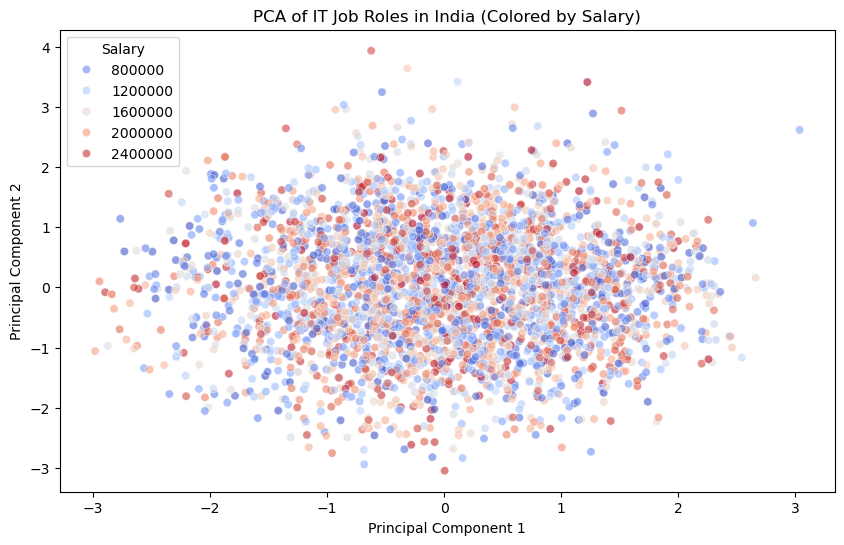

In [9]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Salary', palette='coolwarm', alpha=0.6)
plt.title('PCA of IT Job Roles in India (Colored by Salary)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Salary')
plt.grid(True)
plt.tight_layout()
plt.show()